# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [123]:
import pandas as pd
import numpy as np
from scipy import stats
from __future__ import division

In [124]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [125]:
# number of callbacks for black-sounding names
b_call=sum(data[data.race=='b'].call)
w_call=sum(data[data.race=='w'].call)
b_samplesize = len(data[data.race=='b'])
w_samplesize = len(data[data.race=='w'])
prop_w = w_call/w_samplesize
prop_b = b_call/b_samplesize
total = len(data)
print("Of {} resumes {}% of white names recieved a call as opposed to {}% of black names"\
      .format(total, prop_w*100, prop_b*100))

Of 4870 resumes 9.65092402464% of white names recieved a call as opposed to 6.4476386037% of black names


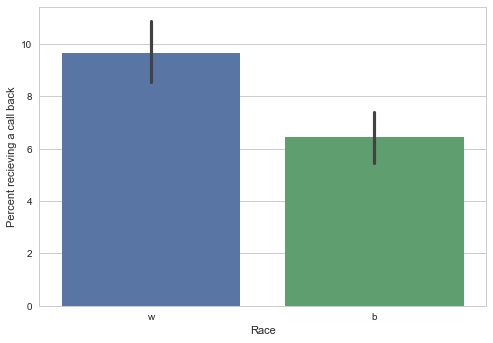

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x="race", y="call", data=data, estimator=lambda y: (sum(y)/len(y))*100)
ax.set_xlabel("Race")
ax.set_ylabel("Percent recieving a call back")
plt.show()

In [127]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


### 1a. Since the data is comparing two proportions, we can use the two-tailed ztest to compare whether the proportions in the two distributions are equal to each other. Here, z-statistic = (p1-p2)/se where p1 is proportion 1, p2 is proportion2 and se is the standard error. 

### 1b. The CLT applies to binomial response variables in a population as long as np and n(1-p) is 5 or greater where n is the sample size and p is the probability of one of the binomial outcomes.  Here np =  235

### 2. The null hypothesis Ho: Pw is equal to Pb where Pw is the probability of getting a call for a person with a white sounding name and Pb is the probability of getting a call for a person with a black sounding name. The alternative hypothesis Ha: Pw is not equal to Pb. 



In [128]:

prop = (b_call+ w_call)/total  #combined proportion of people who get a call back 
se =  np.sqrt(prop*(1-prop)*(1/total) ) #standard error 
z_stat = (prop_w-prop_b)/se #z-statistic 
p = (1-stats.norm.cdf(abs(z_stat))) * 2 # two-tailed p-value 

print("The z-statistic is {} and the p-value is {}".format(z_stat, p))

## for person with a white sounding name 
se_w = np.sqrt(prop_w*(1-prop_w)*(1/w_samplesize))
#margin of error (95%) = z-value * standard error,The the z-value for 95% is 1.96 
MOE_w = 1.96 * se_w
CI_w = (round(prop_w-MOE_w,2),round(prop_w+MOE_w,2 ))

## for person with a black sounding name 
se_b = np.sqrt(prop_b*(1-prop_b)*(1/b_samplesize))
#margin of error (95%) = z-value * standard error,The the z-value for 95% is 1.96 
MOE_b = 1.96 * se_b
CI_b = (round(prop_b-MOE_b,2),round(prop_b+MOE_b,2 ))
print("For a person with a white sounding name, the 95% margin of error is {} and the confidence \
interval is {} whereas a for a white sounding name, the 95% margin of error is {} and the confidence \
interval is {}"\
      .format(round(MOE_w,2), CI_w,round(MOE_b,2), CI_b)) 

The z-statistic is 8.21682430487 and the p-value is 2.22044604925e-16
For a person with a white sounding name, the 95% margin of error is 0.01 and the confidence interval is (0.08, 0.11) whereas a for a white sounding name, the 95% margin of error is 0.01 and the confidence interval is (0.05, 0.07)


### 3. Based on the z-statistic and the p-value we can reject the null hypothesis. The probability of getting a call with a white sounding name is higher than the probability of getting a call with a black sounding name. A person with a white sounding name will recieve a call back between 8-11% of the time (with a 5% error rate) whereas a a person with a black sounding name will only recieve a callback 5-7% of the time.    


### 4. Our preliminary analyses show that for a random pool of resumes, race does predict the probability of getting a call back from a potential employers.  Black sounding names receive on average  3% less calls. These findings support the idea that employers may dicriminate between resumes based on racial perception.  

### 5. However, this is not the complete story as we are only looking at names as a predictor of the probability of recieving a call back. While race/name is significant there are a number of other factors involved. Other factors like the number of prior jobs, the applicants education level etc. are likely to predict the proportion of calls recieved. In the example below, it is evident that years of experience is can predict the likihood of recieving a call. Racial bias may also change with experience levels. 

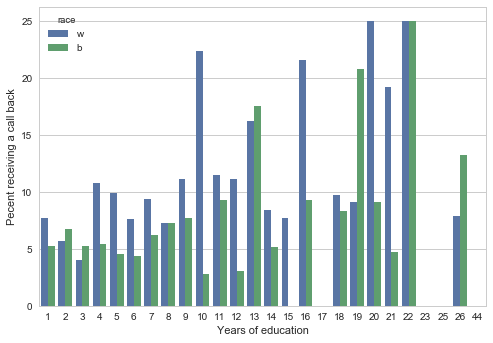

In [122]:
sns.set_style("whitegrid")
ax = sns.barplot(y="call", x="yearsexp", hue ="race",ci=None, data=data, estimator=lambda y: (sum(y)/len(y))*100)
ax.set_ylabel("Pecent receiving a call back")
ax.set_xlabel("Years of education")
plt.show()

In [130]:
data[['yearsexp','race','call']].groupby(['yearsexp']).sum()

## the caveat for the above graph is that the sample sizes for some experience groups is pretty small. 
#It may make sense to bin these data

,call
yearsexp,
1,3.0
2,22.0
3,9.0
4,44.0
5,36.0
6,49.0
7,42.0
8,42.0
9,15.0
